# Example model in Tensorflow v2 with Keras API

Within this example the main library within tensorflow will be demonstrated. Keras is high-level API for ML/DL. Most of the time it will be the only sublibrary required during projects. For this example the Fashion MNIST dataset will be used. A classic, all too well known dataset. 

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Data Preprocessing

In [15]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [16]:
x_val,x_train=x_train[:5000]/255.0,x_train[5000:]/255.0
y_val,y_train=y_train[:5000],y_train[5000:]

In [17]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Sequential Keras API

In [7]:
model=keras.Sequential()

In [9]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(150,activation='relu'))
model.add(keras.layers.Dense(75,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [17]:
model.compile(keras.optimizers.Adam(learning_rate=0.0001),
              loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [18]:
history=model.fit(x=x_train,y=y_train,batch_size=32,epochs=10,validation_data=(x_val,y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 121us/sample - loss: 0.6138 - accuracy: 0.7963 - val_loss: 0.4439 - val_accuracy: 0.8502
Epoch 2/10
55000/55000 [==============================] - 6s 116us/sample - loss: 0.4112 - accuracy: 0.8550 - val_loss: 0.3867 - val_accuracy: 0.8666
Epoch 3/10
55000/55000 [==============================] - 7s 119us/sample - loss: 0.3690 - accuracy: 0.8688 - val_loss: 0.3516 - val_accuracy: 0.8742
Epoch 4/10
55000/55000 [==============================] - 7s 119us/sample - loss: 0.3435 - accuracy: 0.8762 - val_loss: 0.3572 - val_accuracy: 0.8732
Epoch 5/10
55000/55000 [==============================] - 7s 121us/sample - loss: 0.3234 - accuracy: 0.8833 - val_loss: 0.3309 - val_accuracy: 0.8826
Epoch 6/10
55000/55000 [==============================] - 7s 124us/sample - loss: 0.3061 - accuracy: 0.8890 - val_loss: 0.3273 - val_accuracy: 0.8790
Epoch 7/10
55000/55000 [===========================

## Functional Keras API

In [11]:
input_layer=keras.layers.Input(shape=[None,28,28])
conv_1=keras.layers.Conv2D(14,kernel_size=(2,2),activation='relu',padding='SAME')(input_layer)
conv_2=keras.layers.Conv2D(14,kernel_size=(5,5),activation='relu',padding='SAME')(input_layer)
concat=keras.layers.Concatenate()([conv_1,conv_2])
output=keras.layers.Dense(10,activation='softmax')(concat)
functional_model=keras.models.Model(inputs=[input_layer],outputs=[output])

## Evaluate model performance

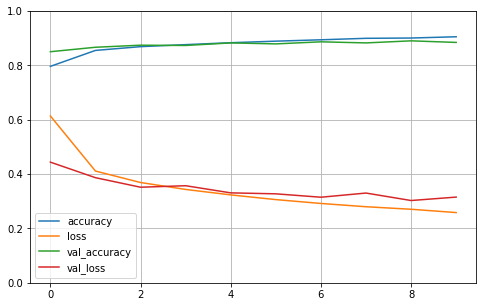

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()